# Stacked Autoencoder Digits Example
**Train Stacked Autoencoders for Image Classification**

This example shows how to train stacked autoencoders to classify images of digits. Converted into Python from https://www.mathworks.com/help/deeplearning/ug/train-stacked-autoencoders-for-image-classification.html

Neural networks with multiple hidden layers can be useful for solving classification problems with complex data, such as images. Each layer can learn features at a different level of abstraction. however, training neural networks with multiple hidden layers can be difficult in practice. One way to effectively train a neural network with multiple layers is by training one layer at a time. You can achieve this by training a special type of network known as an autoencoder for each desired hidden layer.

This example shows you how to train a neural network with two hidden layers to classify digits in the images. First you train the hidden layers individually in an unsupervised fashion using autoencoders. Then you train a final softmax layer, and join the layers together to form a stacked network, which you train one final time in a supervised fashion.


(5000, 784)
(5000, 784)


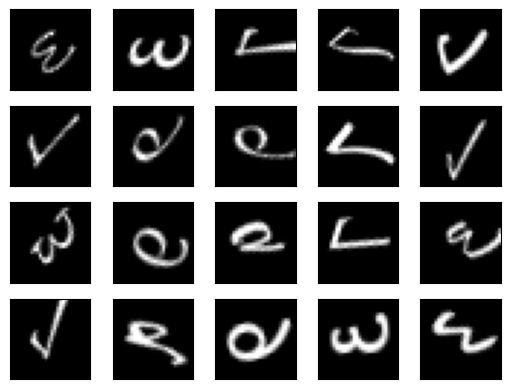

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import drive
## Data set
# This example uses synthetic data throughout, for training and testing.
# The synthetic images have been generated by applying random affine
# transformations to digit images created using different fonts.
#
# Each digit image is 28-by-28 pixels, and there are 5,000 training
# examples. You can load the training data, and view some of the images.

# Load the training and testing data into memory.
#drive.mount('/content/drive')
with open('data/xTrain.csv', 'r') as f:
  x_train = np.genfromtxt(f, dtype='f4', delimiter=',').T
with open('data/tTrain.csv', 'r') as f:
  y_train = np.genfromtxt(f, dtype='f4', delimiter=',').T
with open('data/xTest.csv', 'r') as f:
  x_test = np.genfromtxt(f, dtype='f4', delimiter=',').T
with open('data/tTest.csv', 'r') as f:
  y_test = np.genfromtxt(f, dtype='f4', delimiter=',').T

print(x_train.shape)
print(x_test.shape)


# display some of the training image
for i in range(20):
  X_img = x_train[i].reshape(28,28)
  plt.subplot(4,5,i+1)
  fig = plt.imshow(X_img,cmap='gray')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

plt.show()

# Reshape and normalize keras data.
#x_train = (x_train.astype('float32')/255).reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = (x_test.astype('float32')/255).reshape((len(x_test), np.prod(x_test.shape[1:])))

The labels for the images are stored in a 10-by-5000 matrix, where in  every column a single element will be 1 to indicate the class that the  digit belongs to, and all other elements in the column will be 0. It  should be noted that if the tenth element is 1, then the digit image is a zero.

In [36]:
## Training the first autoencoder
# Begin by training a sparse autoencoder on the training data without using
# the labels
#
# An autoencoder is a neural network which attempts to replicate its input
# at its output. Thus, the size of its input will be the same as the size
# of its output. When the number of neurons in the hidden layer is less
# than the size of the input, the autoencoder learns a compressed
# representation of the input.
#
# Nueral networkds have weights randomly initialized before training
# Therefore the results from training are different each time. To avoid
# this behavior, explicitly set the random number generator seed.
np.random.seed(0)

In [37]:
##
# Set the size of the hidden layer for the autoencoder. For the autoencoder
# that you are going to train, it is a good idea to make this smaller than
# the input size.
hiddenSize1 = 120

In [38]:
import keras
from keras import layers
##
# The type of autoencoder that you will train is an autoencoder. The autoencoder
# consists of two layers, the first layer consists of 100 sigmoid neurons which
# encodes the image into a 100 length feature vector.
# The decoder layer learns the mapping from the encoded feature vector back to
# the original image.

in_size = 784
#Autoencoder layer 1
in_img = keras.Input(shape=(in_size,))  # Specify input shape
encoded = layers.Dense(hiddenSize1, activation='sigmoid',name='Encoder')(in_img) # Encoder Layer
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)  # decoder layer

# Create the network model
autoencoder = keras.Model(in_img, decoded)
# We also create a model for only the encoder section of the network
encoder = keras.Model(in_img, encoded)
# Initialize the weights and specify our loss function (for measuring training
# error)
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')
# Run unsupervised training on the training set. We run the training for 100 epochs.
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1338
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0451
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0445
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0442
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0437
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0434
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0430
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 13/100
20/20 [=================

(784,)
0.21637365


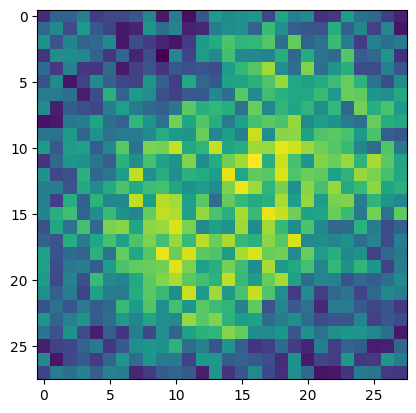

In [39]:
#Part a
weight1=autoencoder.layers[1].get_weights()
#print(weight1)
weights = weight1[0][:,0]
bias = weight1[1][0]
print(weights.shape)
print(bias)

plt.imshow(weights.reshape((28,28)))
plt.show()

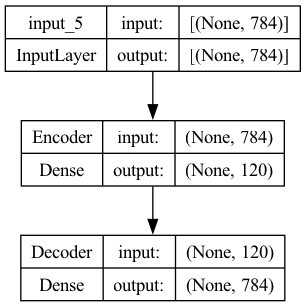

In [40]:
##
# You can view a diagram of the autoencoder. The autoencoder is comprised
# of an encoder followed by a decoder. The encoder maps an input to a
# hidden representation, and the decoder attempts to reverse this mapping
# to reconstruct the original input.

from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png',show_shapes=True, show_layer_names=True)

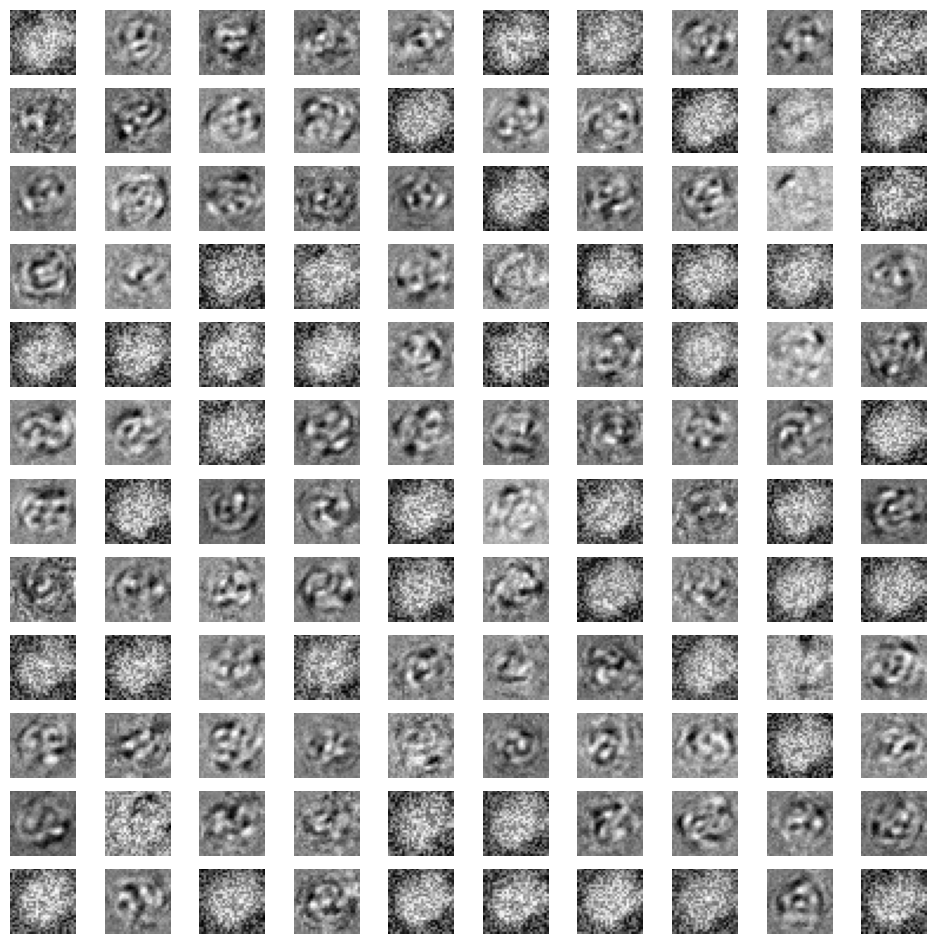

In [41]:
## Visualizing the weights of the first autoencoder
# The mapping learned by the encoder part of an autoencoder can be useful
# for extracting features from data. Each neuron in the encoder has a
# vector of weights associated with it which will be tuned to respond to a
# particular visual feature. You can view a representation of these
# features.

import math
n_cols = math.ceil(hiddenSize1 / 10)
fig = plt.figure(figsize=(12,12))


for i in range(hiddenSize1):
  w = autoencoder.layers[1].get_weights()[0][:,i].reshape(28,28)
  plt.subplot(n_cols, 10, i+1)
  plt.imshow(w,cmap='gray')
  plt.axis("off")

plt.show()

In [42]:
##
# The 100-dimensional output from the hidden layer of the autoencoder is a
# compressed version of the input. Train the next autoencoder on a set of these
# vectors extracted from the training data. First, you must use the encoder
# from the trained autoencoder to generate the features.
feat1 = encoder.predict(x_train)
hiddenSize2 = 40

157/157 [==============================] - 0s 508us/step


In [43]:
## Training the second autoencoder
# After training the first autoencoder, you train the second autoencoder in
# a similar way. The main difference is that you use the features that were
# generated from the first autoencoder as the training data in the second
# autoencoder. Also, you decrease the size of the hidden representation to
# 50, so that the encoder in the second autoencoder learns an even smaller
# representation of the input data.

in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')


autoencoder2.fit(feat1, feat1, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1507
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1089
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0874
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0800
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0774
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0761
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0754
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0745
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0741
Epoch 11/100
20/20 [==============================] - 0s 982us/step - loss: 0.0737
Epoch 12/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0732
Epoch 13/100
20/20 [===============

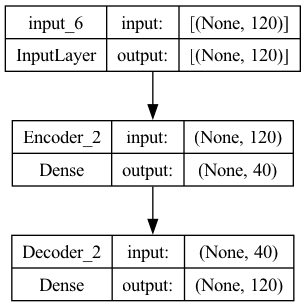

In [44]:
##
# Once again, you can view the autoencoder structure using plot model
plot_model(autoencoder2, to_file='model.png',show_shapes=True, show_layer_names=True)

In [45]:
##
# You can extract a second set of features by passing the previous set
# through the encoder from the second autoencoder.
feat2 = encoder2.predict(feat1)

157/157 [==============================] - 0s 329us/step


In [46]:
from tensorflow.keras.utils import to_categorical
##
# The original vectors in the training data had 784 dimensions. After
# passing them through the first encoder, this was reduced to 100
# dimensions. After using the second encoder, this was reduced again to 50
# dimensions. You can now train a final layer to classify these
# 50-dimensional vectors into different digit classes.

## Training the final softmax layer
# Train a softmax layer to classify the 50-dimensional feature vectors.
# Unlike the autoencoders, you train the softmax layer in a supervised
# fashion using labels for the training data.

soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(10,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 661us/step - loss: 0.0921
Epoch 2/100
20/20 [==============================] - 0s 637us/step - loss: 0.0912
Epoch 3/100
20/20 [==============================] - 0s 797us/step - loss: 0.0905
Epoch 4/100
20/20 [==============================] - 0s 726us/step - loss: 0.0899
Epoch 5/100
20/20 [==============================] - 0s 646us/step - loss: 0.0894
Epoch 6/100
20/20 [==============================] - 0s 627us/step - loss: 0.0887
Epoch 7/100
20/20 [==============================] - 0s 581us/step - loss: 0.0881
Epoch 8/100
20/20 [==============================] - 0s 541us/step - loss: 0.0875
Epoch 9/100
20/20 [==============================] - 0s 606us/step - loss: 0.0869
Epoch 10/100
20/20 [==============================] - 0s 547us/step - loss: 0.0863
Epoch 11/100
20/20 [==============================] - 0s 609us/step - loss: 0.0857
Epoch 12/100
20/20 [==============================] - 0s 530us/step - loss: 0.0851
Epoch 13/100


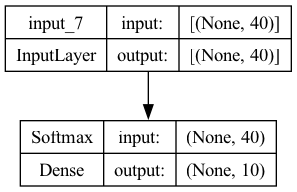

In [47]:
##
# Viewing the structure of the sofmax network
plot_model(softnet, to_file='model.png',show_shapes=True, show_layer_names=True)

In [48]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)

157/157 [==============================] - 0s 298us/step


In [49]:
## Forming a stacked neural network
# You have trained three separate components of a stacked neural network in
# isolation.

# As was explained, the encoders from the autoencoders have been used to
# extract features. You can stack the encoders from the autoencoders
# together with the softmax layer to form a stacked network for classification.

#First we must specify the structure of our stacked model
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(10, activation='softmax')(layer2)

#Then the model must be created and initialized.
stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")

# Then we transfer the weights from our previously trained layers.
stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

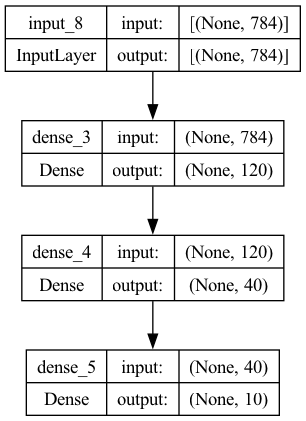

In [50]:
## Part B
# View the stacked network
plot_model(stacked_ae, to_file='model.png',show_shapes=True, show_layer_names=True)

In [51]:
##
# You can visualize the results with a confusion matrix.
import seaborn as sn
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((10,10))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

157/157 [==============================] - 0s 455us/step


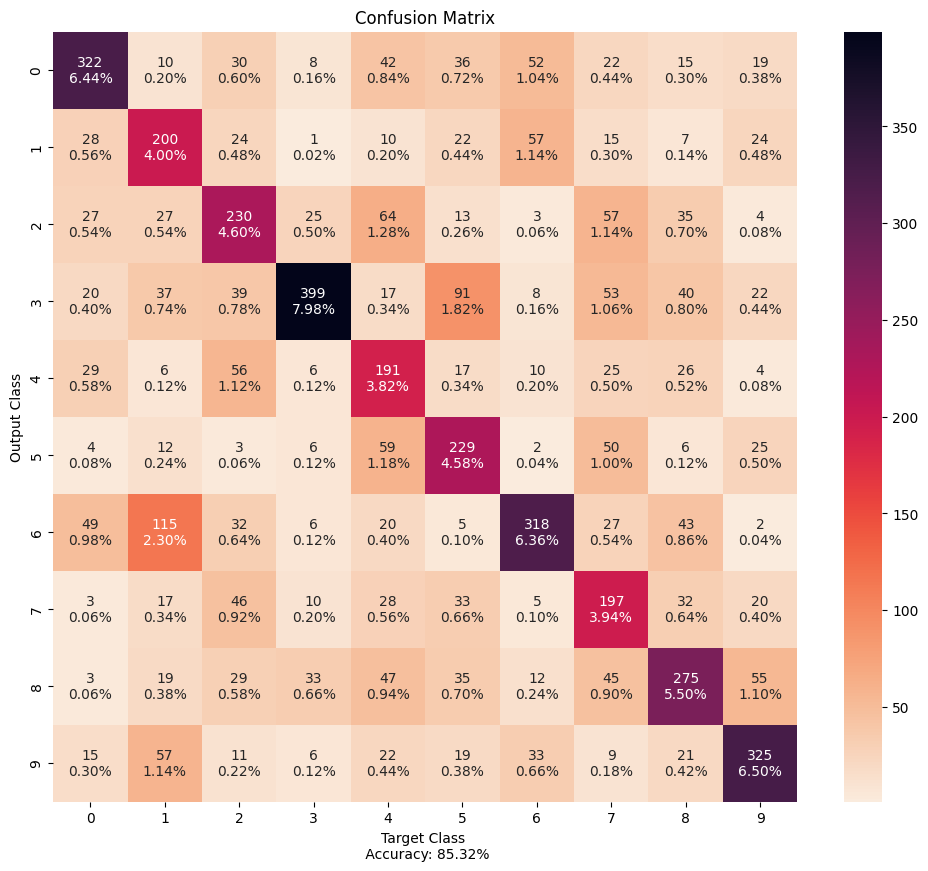

In [52]:
# Run x_Test through the stacked autoencoder.
y_stacked = stacked_ae.predict(x_test)
# we need to convert it from 1 hot format back to the mnist labeling.
y_classified = np.argmax(y_stacked, axis=1)


y_true = np.argmax(y_test, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

In [53]:
## Fine tuning the stacked neural network
# The results for the stacked neural network can be improved by performing
# backpropagation on the whole multilayer network. This process is often
# referred to as fine tuning.
#
# You fine tune the network by retraining it on the training data in a
# supervised fashion. Before you can do this, you have to reshape the
# training images into a matrix, as was done for the test images.

stacked_ae.fit(x_train, y_train, epochs=100,batch_size = 256, shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0566
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 13/100
20/20 [=================

157/157 [==============================] - 0s 463us/step


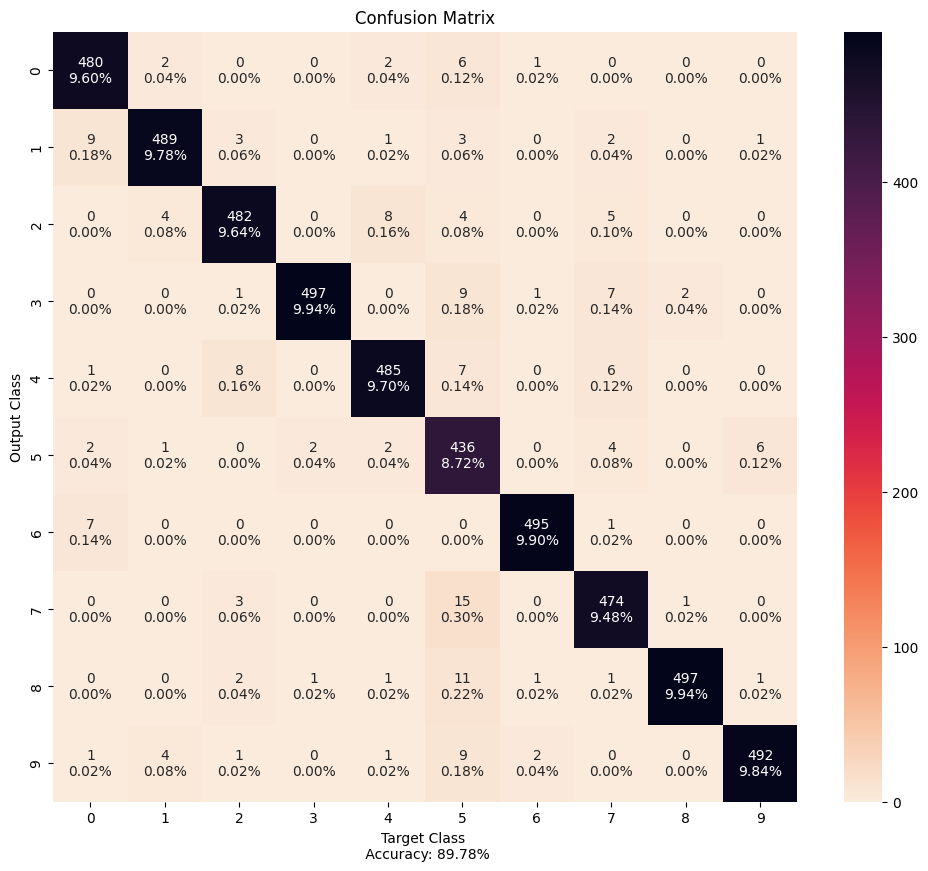

In [54]:
# Finally,view the results of the fine tuning on the confusion matrix.
#Part C
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

# plot confusion matrix
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_classified, y_true)

In [55]:
#drive.flush_and_unmount()